 <font face="Times New Roman" size="10" style='color:red'><b> <center>Multivariate Linear Regression</font></center></b>

 <font face="Times New Roman" size="5" style='color:black'><b> <center>Dataset Red Wine</font></center></b>

#### Import delle librerie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, pearsonr
from statistics import mode, median
import seaborn as sns

## Caricamento dei dati

In [2]:
red_wine = pd.read_csv('./dataset/winequality/winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Partizionamento in input e output

In [4]:
X, y = red_wine.iloc[:, 0:11], red_wine.iloc[:, 11]
#X sono le variabili di input, y è la variabile di output
n = X.shape[0]
ones = np.ones(n)
print('Partizionamento eseguito correttamente!')

Partizionamento eseguito correttamente!


## Analisi esplorativa delle variabili

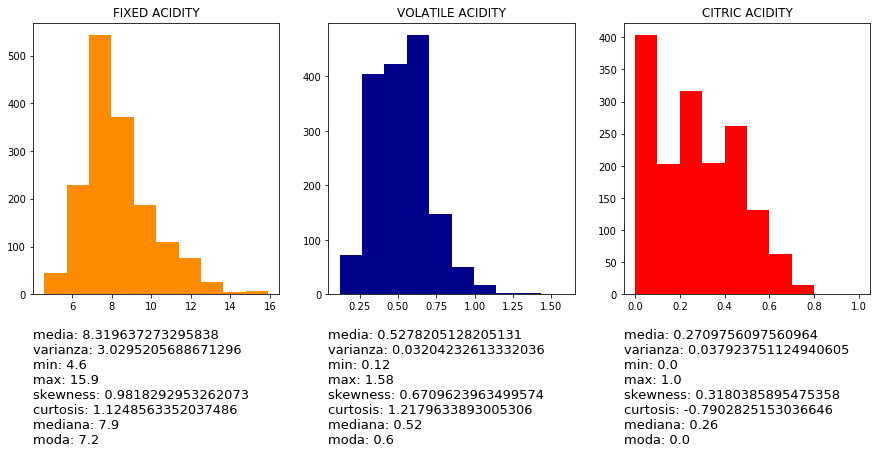

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(red_wine.iloc[:, 0], color='darkorange')
axes[0].set_title('fixed acidity'.upper())
axes[0].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 0]), np.var(red_wine.iloc[:, 0]),
            np.min(red_wine.iloc[:, 0]), np.max(red_wine.iloc[:, 0]),
            skew(red_wine.iloc[:, 0]), kurtosis(red_wine.iloc[:, 0]),
            median(red_wine.iloc[:, 0]), mode(red_wine.iloc[:, 0])),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(red_wine.iloc[:, 1], color='darkblue')
axes[1].set_title('volatile acidity'.upper())
axes[1].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 1]), np.var(red_wine.iloc[:, 1]),
            np.min(red_wine.iloc[:, 1]), np.max(red_wine.iloc[:, 1]),
            skew(red_wine.iloc[:, 1]), kurtosis(red_wine.iloc[:, 1]),
            median(red_wine.iloc[:, 1]), mode(red_wine.iloc[:, 1])),
    fontsize=13,
    transform=axes[1].transAxes,
)

axes[2].hist(red_wine.iloc[:, 2], color='red')
axes[2].set_title('citric acidity'.upper())
axes[2].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 2]), np.var(red_wine.iloc[:, 2]),
            np.min(red_wine.iloc[:, 2]), np.max(red_wine.iloc[:, 2]),
            skew(red_wine.iloc[:, 2]), kurtosis(red_wine.iloc[:, 2]),
            median(red_wine.iloc[:, 2]), mode(red_wine.iloc[:, 2])),
    fontsize=13,
    transform=axes[2].transAxes)

plt.show()

   **Considerazioni**:
- Le distribuzioni relative alle feature **fixed acidity** e **volatile acidity** sembrano essere simmetriche; in ogni caso la simmetria la potremmo ottenere con valori della **skewness** prossimi a *zero*. Nel primo caso, abbiamo una media pari a circa **8.32** e una varianza di circa **3.03**, nel secondo abbiamo ottenuto una media di **0.53** e una varianza di **0.03**. Nel terzo una media di circa **0.28** e una varianza di **0.04**.
- Le distribuzioni di **volatile acidity** e di **citric acidity** hanno una varianza molto bassa, il che spiega che i dati non si discostano di molto rispettivamente dalla media aritmetica 
- La **skewness** misura la **asimmetria** della distribuzione attorno al suo valore d'attesa: in tutti e tre i casi il suo valore è positivo, quindi avremo una *coda* a destra della **media** che è più lunga della *coda* a sinistra
- La **curtosi** misura la rapidità con cui le *code* della distribuzione si annullano: notiamo che nel terzo caso abbiamo una curtosi negativa, ciò indica che la curva è platicurtica, cioè più *piatta* di una normale; negli altri due casi, avendo **curtosi** positiva, possiamo desumere che la curva sia leptocurtica, cioè più *appuntita* di una normale


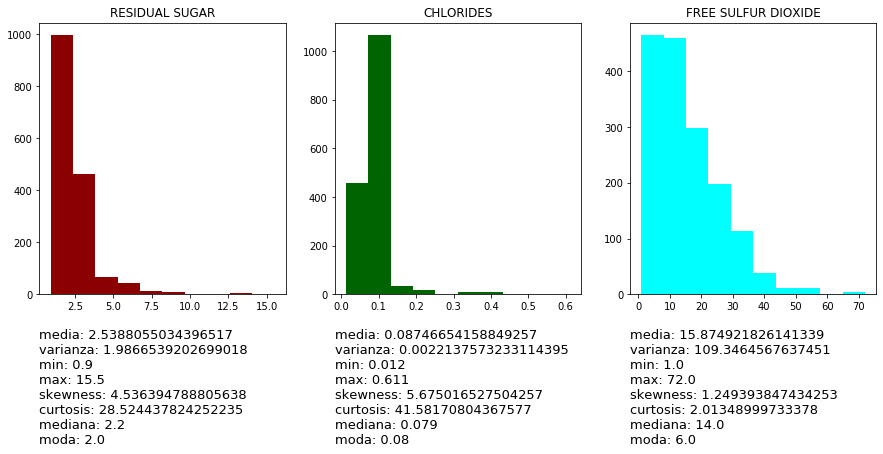

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(red_wine.iloc[:, 3], color='darkred')
axes[0].set_title('residual sugar'.upper())
axes[0].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 3]), np.var(red_wine.iloc[:, 3]),
            np.min(red_wine.iloc[:, 3]), np.max(red_wine.iloc[:, 3]),
            skew(red_wine.iloc[:, 3]), kurtosis(red_wine.iloc[:, 3]),
            median(red_wine.iloc[:, 3]), mode(red_wine.iloc[:, 3])),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(red_wine.iloc[:, 4], color='darkgreen')
axes[1].set_title('chlorides'.upper())
axes[1].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 4]), np.var(red_wine.iloc[:, 4]),
            np.min(red_wine.iloc[:, 4]), np.max(red_wine.iloc[:, 4]),
            skew(red_wine.iloc[:, 4]), kurtosis(red_wine.iloc[:, 4]),
            median(red_wine.iloc[:, 4]), mode(red_wine.iloc[:, 4])),
    fontsize=13,
    transform=axes[1].transAxes,
)

axes[2].hist(red_wine.iloc[:, 5], color='cyan')
axes[2].set_title('free sulfur dioxide'.upper())
axes[2].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 5]), np.var(red_wine.iloc[:, 5]),
            np.min(red_wine.iloc[:, 5]), np.max(red_wine.iloc[:, 5]),
            skew(red_wine.iloc[:, 5]), kurtosis(red_wine.iloc[:, 5]),
            median(red_wine.iloc[:, 5]), mode(red_wine.iloc[:, 5])),
    fontsize=13,
    transform=axes[2].transAxes)

plt.show()

**Considerazioni**:
- Il valore della varianza nella **seconda** distribuzione è molto basso, ciò indica che i dati variano di *poco* dalla media aritmetica; mentre, nel terzo grafico la varianza molto *alta* indica una **alta dispersione** dei valori dalla media
- Per quanto concerne la **skewness**(cioè la asimmetria della distribuzione), possiamo notare come essa sia positiva in tutti i casi. In particolare, la coda tende ad allungarsi a destra formando una gobba a sinistra della media
- La **curtosi**, nei primi due casi è alta: notiamo infatti la presenza di code lunghe e quindi la presenza di dati molto lontani dalla media. Nel terzo caso, questo aspetto è meno evidente, avendo un valore della curtosi abbastanza basso
- La **mediana** non coincide esattamente con la media in tutti e tre i casi, anche se nel secondo grafico, il valore si discosta di molto poco da quello medio

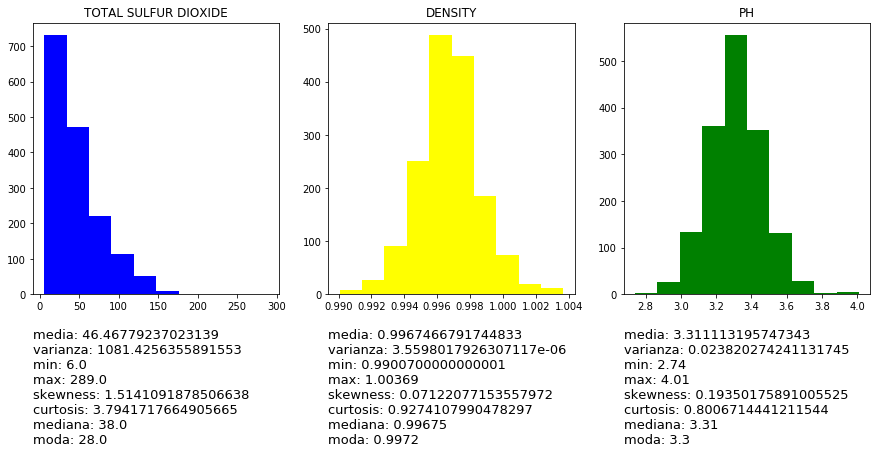

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(red_wine.iloc[:, 6], color='blue')
axes[0].set_title('total sulfur dioxide'.upper())
axes[0].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 6]), np.var(red_wine.iloc[:, 6]),
            np.min(red_wine.iloc[:, 6]), np.max(red_wine.iloc[:, 6]),
            skew(red_wine.iloc[:, 6]), kurtosis(red_wine.iloc[:, 6]),
            median(red_wine.iloc[:, 6]), mode(red_wine.iloc[:, 6])),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(red_wine.iloc[:, 7], color='yellow')
axes[1].set_title('density'.upper())
axes[1].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 7]), np.var(red_wine.iloc[:, 7]),
            np.min(red_wine.iloc[:, 7]), np.max(red_wine.iloc[:, 7]),
            skew(red_wine.iloc[:, 7]), kurtosis(red_wine.iloc[:, 7]),
            median(red_wine.iloc[:, 7]), mode(red_wine.iloc[:, 7])),
    fontsize=13,
    transform=axes[1].transAxes,
)

axes[2].hist(red_wine.iloc[:, 8], color='green')
axes[2].set_title('pH'.upper())
axes[2].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 8]), np.var(red_wine.iloc[:, 8]),
            np.min(red_wine.iloc[:, 8]), np.max(red_wine.iloc[:, 8]),
            skew(red_wine.iloc[:, 8]), kurtosis(red_wine.iloc[:, 8]),
            median(red_wine.iloc[:, 8]), mode(red_wine.iloc[:, 8])),
    fontsize=13,
    transform=axes[2].transAxes)

plt.show()

**Considerazioni**:
- Per quanto riguarda la **varianza**, notiamo che nel primo caso è molto alta, quindi la dispersione dei valori è altrettanto alta. Nel secondo caso è molto bassa invece(notare la notazione scientifica mostrata sotto il rispettivo grafico); nel terzo si discosta da poco dal valore **zero**: in questi ultimi due casi possiamo, quindi, desumere che i dati non variano di molto rispetto alla media aritmetica
- La **skewness** è piuttosto bassa nel secondo istogramma e questo dimostra (anche graficamente) di quanto la distribuzione sia quasi centrata perfettamente attorno alla media; a supporto di questo, notiamo anche la varianza molto bassa. Qualcosa di molto simile accade con il terzo istogramma, mentre per il primo, avendo una skewness pari a circa *1.51* avremo una coda verso destra 
- La **curtosi** positiva nel primo caso e non pari a zero indica la presenza di dati non vicini alla media; negli altri casi, avendo una curtosi non molto distante dallo zero, avremo una distribuzione che sembra essere normalmente concentrata intorno alla media (normocurtica)
- Negli ultimi due casi, osserviamo la **mediana** coincidente con la **media**
- In conclusione, possiamo desumere che le ultime due distribuzioni sono molto simili ad una **gaussiana**

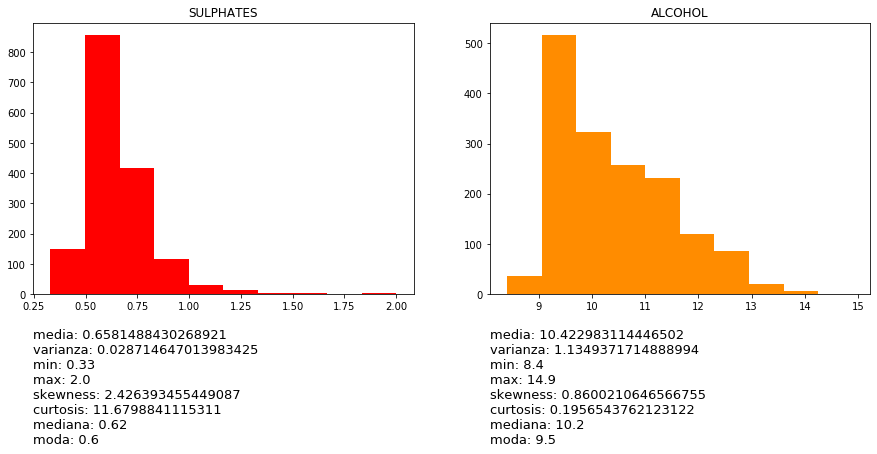

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(red_wine.iloc[:, 9], color='red')
axes[0].set_title('sulphates'.upper())
axes[0].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 9]), np.var(red_wine.iloc[:, 9]),
            np.min(red_wine.iloc[:, 9]), np.max(red_wine.iloc[:, 9]),
            skew(red_wine.iloc[:, 9]), kurtosis(red_wine.iloc[:, 9]),
            median(red_wine.iloc[:, 9]), mode(red_wine.iloc[:, 9])),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(red_wine.iloc[:, 10], color='darkorange')
axes[1].set_title('alcohol'.upper())
axes[1].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(red_wine.iloc[:, 10]), np.var(red_wine.iloc[:, 10]),
            np.min(red_wine.iloc[:, 10]), np.max(red_wine.iloc[:, 10]),
            skew(red_wine.iloc[:, 10]), kurtosis(red_wine.iloc[:, 10]),
            median(red_wine.iloc[:, 10]), mode(red_wine.iloc[:, 10])),
    fontsize=13,
    transform=axes[1].transAxes,
)

plt.show()

**Considerazioni**:
- La **varianza** nel primo caso è abbastanza bassa (0.02), il che indica una poca dispersione dei valori attorno alla media; nel secondo casa la dispersione è leggermente più alta, avendo un valore di varianza più alto
- La **skewness** in ambo i casi è positiva, quindi abbiamo una coda che tende ad allungarsi a destra formando una gobba a sinistra della media: questo lo vediamo in maniera più accentuata nel primo grafico, avendo una skewness più alta
- La **curtosi** nel primo caso è molto più alta rispetto al secondo caso: questo indica che abbiamo una curva *leptocurtica*, cioè normalmente concentrata attorno alla media(infatti la varianza è piuttosto bassa e abbiamo una bassa dispersione). Nel secondo caso, l'indice di curtosi è basso e la curva dei valori osservati sarà *platicurtica*, cioè poco concentrata attorno alla media

## Analisi della correlazione fra le variabili

### Heatmap della correlazione

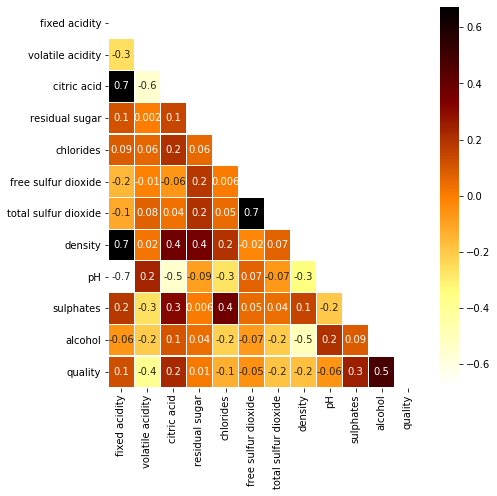

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
mask = np.triu(red_wine.corr())
sns.heatmap(red_wine.corr(),
            annot=True,
            fmt='.1g',
            mask=mask,
            ax=ax,
            linecolor='white',
            linewidths=0.2,
            cmap='afmhot_r')
plt.show()

**Considerazioni**
1. Possiamo notare dall'HeatMap di come la correlazione fra la variabile *quality* e *alcohol* sia quella con il valore più alto; a seguire abbiamo le variabili *volatile acidity* e *sulphates*
2. Notiamo la presenza di buona correlazione fra le variabili *total sulfur dioxide* e *free sulfur dioxide*
3. La considerazione di dipendenza fra variabili di input possiamo notarla anche fra *density* e *fixed acidity*, e fra *citric acid* e *fixed acidity*

### Selezione delle features sulla base della matrice di correlazione 

In [9]:
pd.DataFrame(red_wine.corr().iloc[:-1, -1].abs()).where(
    lambda x: x > 0.15).dropna().sort_values(
        by=['quality'],
        ascending=False).style.background_gradient(cmap='autumn_r')

,quality
alcohol,0.476166
volatile acidity,0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,0.185100
density,0.174919


## Calcolo dei residui utilizzando la Regressione Multipla

1. Calcolo della regressione e dei rispettivi residui usando *una sola* variabile

**Nota**: il residuo è stato calcolato usando :$$||y - \hat{y}||_{2}^2$$

In [10]:
resid_one_variable = []
for i in range(0, X.shape[1]):
    A = np.vstack((ones, X.iloc[:, i])).T
    solution = (np.linalg.inv(A.T.dot(A))).dot(A.T.dot(y))
    y_hat_one = A.dot(solution)
    residuo = np.linalg.norm(y - y_hat_one)**2
    resid_one_variable += [residuo]
pd.DataFrame({
    'residuo': resid_one_variable
}, index=list(X.columns)).style.highlight_min()

,residuo
fixed acidity,1026.127421
volatile acidity,883.198053
citric acid,988.759858
residual sugar,1041.968595
chlorides,1024.847549
free sulfur dioxide,1039.490870
total sulfur dioxide,1006.458321
density,1010.278252
pH,1038.691657
sulphates,976.299757


+ **Nota**: la variabile **alcohol** risulta quella con il residuo più basso, quindi ora andiamo a controllare il residuo fra questa e tutte le altre 

2. Analisi dei residui usando *due* variabili per volta, tenendo come riferimento la variabile **alcohol**

In [11]:
resid_two_variables = []
columns_two_residuals = X.columns[:10]
for i in range(0, X.shape[1] - 1):
    A = np.vstack((ones, X.iloc[:, 10], X.iloc[:, i])).T
    solution = (np.linalg.inv(A.T.dot(A))).dot(A.T.dot(y))
    y_hat_two = A.dot(solution)
    residuo = np.linalg.norm(y - y_hat_two)**2
    resid_two_variables += [residuo]
pd.DataFrame({
    'alcohol': resid_two_variables
}, index=columns_two_residuals).style.highlight_min()

,alcohol
fixed acidity,781.247931
volatile acidity,711.796230
citric acid,773.917299
residual sugar,805.828977
chlorides,805.259812
free sulfur dioxide,805.545847
total sulfur dioxide,797.600827
density,800.667699
pH,779.508372
sulphates,760.893871


- **Nota**: La variabile **volatile acidity** mostra il residuo più basso, pertanto la coppia (*alcohol*,*volatile acidity*) mostra il valore più basso di residuo

In [12]:
resid_three_variables = []
columns = [
    X.columns[0], X.columns[2], X.columns[3], X.columns[4], X.columns[5],
    X.columns[6], X.columns[7], X.columns[8], X.columns[9]
]
for i in [0, 2, 3, 4, 5, 6, 7, 8, 9]:
    A = np.vstack((ones, X.iloc[:, 10], X.iloc[:, 1], X.iloc[:, i])).T
    solution = (np.linalg.inv(A.T.dot(A))).dot(A.T.dot(y))
    y_hat_three = A.dot(solution)
    residuo = np.linalg.norm(y - y_hat_three)**2
    resid_three_variables += [residuo]
pd.DataFrame({
    'alcohol_volatile_acidity': resid_three_variables
},
             index=list(columns)).style.highlight_min()

,alcohol_volatile_acidity
fixed acidity,706.090130
citric acid,711.602604
residual sugar,711.786172
chlorides,711.420069
free sulfur dioxide,711.134162
total sulfur dioxide,705.423192
density,709.855261
pH,705.844707
sulphates,692.104643


 + **Nota**: Visualizziamo la presenza di un valore di residuo di circa *692.10* per la variabile **sulphates**, il che indica che aumentando lo spazio delle features non abbiamo un miglioramento *notevole* del residuo

## Regressione Multipla 

### Partizionamento in Training Set e Test Set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                    test_size = 0.3,
                    random_state = 0,
                    stratify = y)
print('Partizionamento eseguito correttamente!')

Partizionamento eseguito correttamente!


### Regressione a una sola variabile

In [6]:
from sklearn.metrics import r2_score

x1 = X_train.iloc[:, 10]
N = x1.shape
A_1 = np.column_stack((np.ones(N), x1))
alpha = np.linalg.solve(A_1.T @ A_1, A_1.T @ y_train)
y_train_pred_one = A_1.dot(alpha)
residuo_uno_train = np.linalg.norm(y_train - y_train_pred_one)
print('Residuo regressione su Training Set a una variabile\f',
      residuo_uno_train**2)

y_test_regr_one = alpha[0] + alpha[1] * (X_test.iloc[:, 10])
print('Residuo regressione su Test Set a una variabile    ',
      np.linalg.norm(y_test - y_test_regr_one)**2)
print('\nr2_score sul train a una variabile',
      r2_score(y_train, y_train_pred_one))
print('r2_score sul test a una variabile ', r2_score(y_test, y_test_regr_one))

Residuo regressione su Training Set a una variabile 565.0513652829717
Residuo regressione su Test Set a una variabile     240.89127780611688

r2_score sul train a una variabile 0.22698095028602538
r2_score sul test a una variabile  0.22592258847239455


### Regressione a due variabili

**Nota**: In questo caso abbiamo bisogno dell' R^2 adjusted per il calcolo della bontà del modello, in quanto si tratta di una regressione lineare bivariata

$$\overline{R}^2 = 1 - (1 - R^2)\frac{n - 1}{n - p - 1}$$

In [8]:
def r_2_adjusted(r, n, p):
    return (1 - (1 - r) * ((n - 1) / 
          (n - p - 1)))

In [9]:
#con due variabili (alcohol e volatile acidity)
x2 = X_train.iloc[:, 1]
N = x1.shape
A_2 = np.column_stack((np.ones(N), x1, x2))
alpha = np.linalg.solve(A_2.T @ A_2, A_2.T @ y_train)
y_train_pred_two = A_2.dot(alpha)
residuo_due_train = np.linalg.norm(y_train - y_train_pred_two)
print('Residuo regressione su Training Set a due variabili\f',
      residuo_due_train**2)

y_test_regr_two = alpha[0] + alpha[1] * (X_test.iloc[:, 10]) + alpha[2] * (
    X_test.iloc[:, 1])
print('Residuo regressione su Test Set a due variabili    ',
      np.linalg.norm(y_test - y_test_regr_two)**2)


r2_score_train_2 = r2_score(y_train, y_train_pred_two)
r2_score_test_2 = r2_score(y_test, y_test_regr_two)

print('\nr2_score adjusted sul train a due variabili',
      r_2_adjusted(r2_score_train_2, A_2.shape[0], A_2.shape[1]))
print('r2_score adjusted sul test a due variabili',
      r_2_adjusted(r2_score_test_2, A_2.shape[0], A_2.shape[1]))

Residuo regressione su Training Set a due variabili 511.11895555235924
Residuo regressione su Test Set a due variabili     201.528445724723

r2_score adjusted sul train a due variabili 0.2988818794237855
r2_score adjusted sul test a due variabili 0.35066829209169514


Abbiamo potuto notare come il residuo sia minore, passando da una regressione con una singola variabile, ad una regressione con due variabili esplicative

### Regressione a tre variabili

**Nota**: Anche in questo caso abbiamo bisogno dell R^2 adjusted per il calcolo della bontà del modello

In [10]:
#con tre variabili (alcohol, volatile acidity, sulphates)
x3 = X_train.iloc[:, 9]
N = x1.shape
A_3 = np.column_stack((np.ones(N), x1, x2, x3))
alpha = np.linalg.solve(A_3.T @ A_3, A_3.T @ y_train)
y_train_pred_three = A_3.dot(alpha)
residuo_tre_train = np.linalg.norm(y_train - y_train_pred_three)
print('Residuo regressione su Training Set a tre variabili\f',
      residuo_tre_train**2)

y_test_regr_three = alpha[0] + alpha[1] * (X_test.iloc[:, 10]) + alpha[2] * (
    X_test.iloc[:, 1]) + alpha[3] * (X_test.iloc[:, 9])
print('Residuo regressione su Test Set a tre variabili    ',
      np.linalg.norm(y_test - y_test_regr_three)**2)


r2_score_train_3 = r2_score(y_train, y_train_pred_three)
r2_score_test_3 = r2_score(y_test, y_test_regr_three)

print('\nr2_score adjusted sul train a tre variabili',
      r_2_adjusted(r2_score_train_3, A_2.shape[0], A_2.shape[1]))
print('r2_score adjusted sul test a tre variabili',
      r_2_adjusted(r2_score_test_3, A_2.shape[0], A_2.shape[1]))

Residuo regressione su Training Set a tre variabili 495.19345082139455
Residuo regressione su Test Set a tre variabili     197.70442847292017

r2_score adjusted sul train a tre variabili 0.3207274005591443
r2_score adjusted sul test a tre variabili 0.36298940956101633


### Verifica della linearità del modello

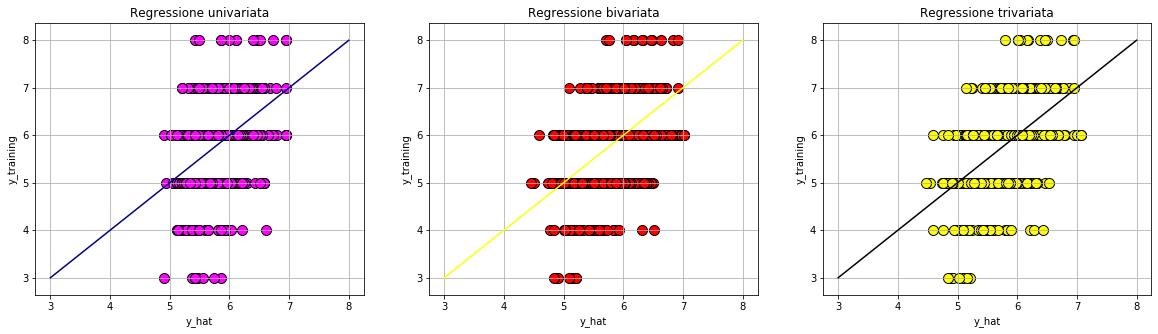

In [18]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 3, 1)
plt.title('Regressione univariata')
plt.xlabel('y_hat')
plt.ylabel('y_training')
plt.plot([3, 8], [3, 8], '-', color='darkblue')
plt.scatter(y_train_pred_one,
            y_train,
            color='magenta',
            marker='o',
            edgecolor='black',
            s=100)

plt.grid()
plt.subplot(1, 3, 2)
plt.title('Regressione bivariata')
plt.xlabel('y_hat')
plt.ylabel('y_training')
plt.plot([3, 8], [3, 8], '-', color='yellow')
plt.scatter(y_train_pred_two,
            y_train,
            color='red',
            marker='o',
            edgecolor='black',
            s=100)
plt.grid()

plt.subplot(1, 3, 3)
plt.title('Regressione trivariata')
plt.plot([3, 8], [3, 8], '-', color='black')
plt.xlabel('y_hat')
plt.ylabel('y_training')
plt.scatter(y_train_pred_three,
            y_train,
            color='yellow',
            marker='o',
            edgecolor='black',
            s=100)
plt.grid()
plt.show()

**Considerazioni**
- Possiamo notare di come i valori non siano disposti in modo lineare, pertanto il modello di regressione lineare non sarà un buon modello che approssima i dati. 
- Difatti, non riusciamo ad individuare un *trend* che mi porti a fare assunzioni circa la linearità dei dati

## Analisi esplorativa dei residui

#### Istogrammi per la ricerca della *normalità* dei residui (Training Set) 

- Questo ci permette di verificare l' **assunzione** che giustifica l'uso del modello di regressione lineare 

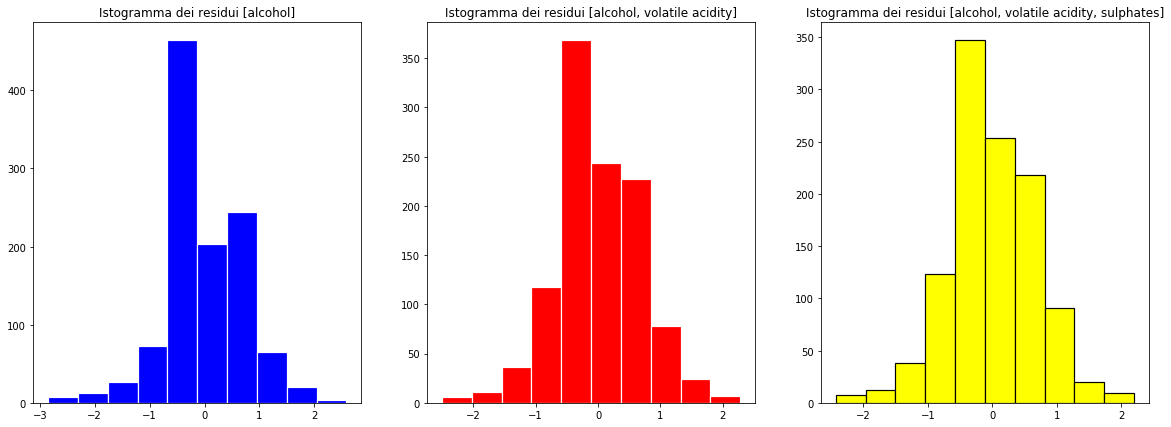

In [13]:
residuo_1_train = y_train - y_train_pred_one
residuo_2_train = y_train - y_train_pred_two
residuo_3_train = y_train - y_train_pred_three
plt.figure(figsize=[20, 7])

#istogramma residui con una variabile
plt.subplot(1, 3, 1)
plt.title("Istogramma dei residui [alcohol]")
plt.hist(residuo_1_train, color='blue', edgecolor='white', linewidth=1.2)
#istogramma residui con due variabili
plt.subplot(1, 3, 2)
plt.title("Istogramma dei residui [alcohol, volatile acidity]")
plt.hist(residuo_2_train, color='red', edgecolor='white', linewidth=1.2)
#istogramma residui con tre variabili
plt.subplot(1, 3, 3)
plt.title("Istogramma dei residui [alcohol, volatile acidity, sulphates]")
plt.hist(residuo_3_train, color='yellow', edgecolor='black', linewidth=1.2)
plt.show()

 **Considerazioni**:
 
 Gli istogrammi mostrano i residui utilizzando un modello di regressione lineare sul **training set** considerando:
 1. Una sola feature (*alcohol*): possiamo notare di come i residui non siano distribuiti normalmente
 2. Due features (*alcohol, volatile acidity*), i residui del modello sembrano essere più vicini ad una distribuzione normale
 3. Tre features (*alcohol, volatile acidity, sulphates*) otteniamo una non differenza nell'andamento dei residui, rispetto al caso di due variabili: questo indica che i residui non variano di molto considerando una regressione con *3* variabili
 4. I residui sembrano essere verosimilmente vicini ad una normale

#### Scatter plot per la ricerca della *omoschedasticità* dei residui (Training Set)

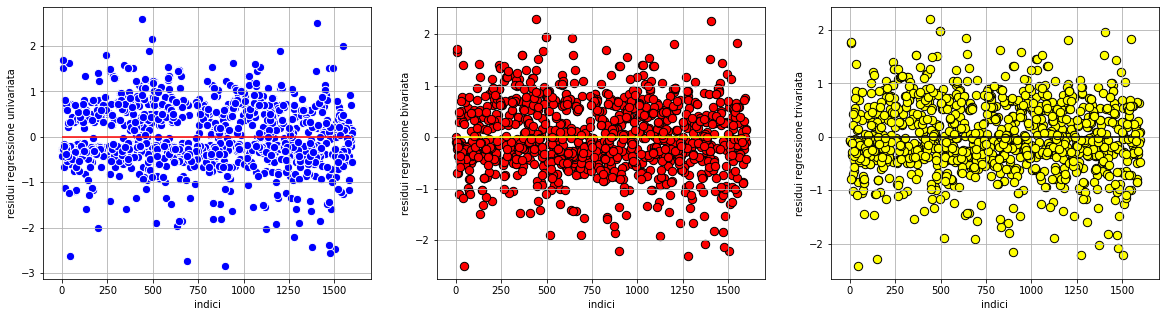

In [14]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 3, 1)
plt.xlabel('indici') 
plt.ylabel('residui regressione univariata') 
plt.hlines(0,0,X.shape[0], color='red')
plt.scatter(X_train.index,
            residuo_1_train,
            color='blue',
            marker='o',
            edgecolor='white',
            s=70)

plt.grid()
plt.subplot(1, 3, 2)
plt.xlabel('indici') 
plt.ylabel('residui regressione bivariata') 
plt.hlines(0,0,X.shape[0], color='yellow')
plt.scatter(X_train.index,
            residuo_2_train,
            color='red',
            marker='o',
            edgecolor='black',
            s=70)
plt.grid()

plt.subplot(1, 3, 3)
plt.xlabel('indici') 
plt.ylabel('residui regressione trivariata') 
plt.hlines(0,0,X.shape[0], color='black')
plt.scatter(X_train.index,
            residuo_3_train,
            color='yellow',
            marker='o',
            edgecolor='black',
            s=70)
plt.grid()
plt.show()

 **Considerazioni**:
- A livello grafico, possiamo osservare che i residui sembrano apparire omoschedastici in tutti e 3 i modelli.

**Riepilogo assunzioni sul Training Set**:
- Sicuramente, poichè dall'analisi dei residui abbiamo osservato la violazione dei requisiti di *indipendenza*, *linearità* e *normalità*, possiamo desumere che il modello di regressione lineare multipla non approssima al meglio il dataset

#### Istogrammi per la ricerca della *normalità* dei residui (Test Set)

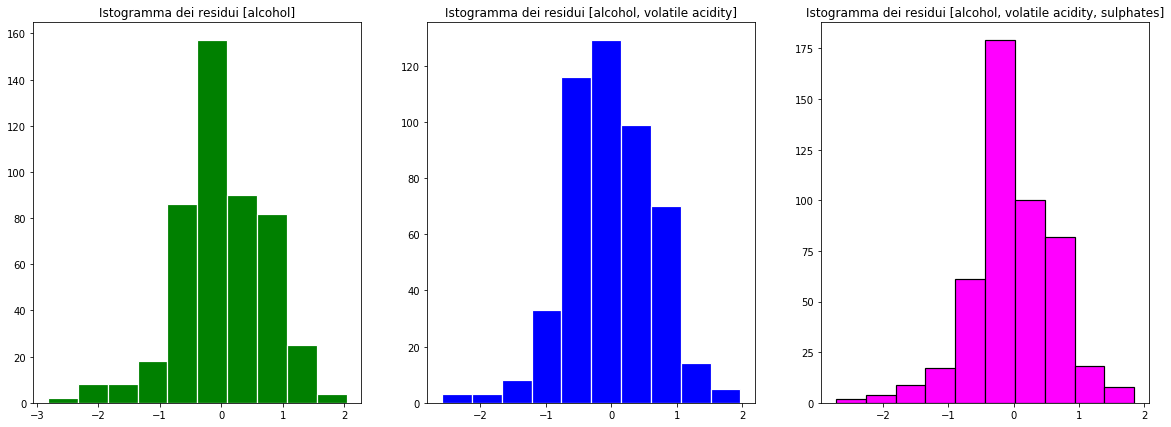

In [15]:
residuo_1_test = y_test - y_test_regr_one
residuo_2_test = y_test - y_test_regr_two
residuo_3_test = y_test - y_test_regr_three
plt.figure(figsize=[20, 7])

#istogramma residui con una variabile
plt.subplot(1, 3, 1)
plt.title("Istogramma dei residui [alcohol]")
plt.hist(residuo_1_test, color='green', edgecolor='white', linewidth=1.2)
#istogramma residui con due variabili
plt.subplot(1, 3, 2)
plt.title("Istogramma dei residui [alcohol, volatile acidity]")
plt.hist(residuo_2_test, color='blue', edgecolor='white', linewidth=1.2)
#istogramma residui con tre variabili
plt.subplot(1, 3, 3)
plt.title("Istogramma dei residui [alcohol, volatile acidity, sulphates]")
plt.hist(residuo_3_test, color='magenta', edgecolor='black', linewidth=1.2)
plt.show()

 **Considerazioni**:
 
 Gli istogrammi mostrano i residui utilizzando un modello di regressione lineare sul **test set** considerando:
 1. Una sola feature (*alcohol*): possiamo notare di come i residui non siano distribuiti normalmente
 2. Due features (*alcohol, volatile acidity*), i residui del modello sembrano essere più vicini ad una distribuzione normale
 3. Tre features (*alcohol, volatile acidity, sulphates*) otteniamo una differenza nell'andamento dei residui, rispetto al caso di due variabili: questo indica la quasi assenza di una distribuzione normale dei residui nella regressione con tre variabili
 4. Il requisito di normalità dei residui non è completamente soddisfatto

#### Scatter plot per la ricerca della *omoschedasticità* dei residui (Test Set)

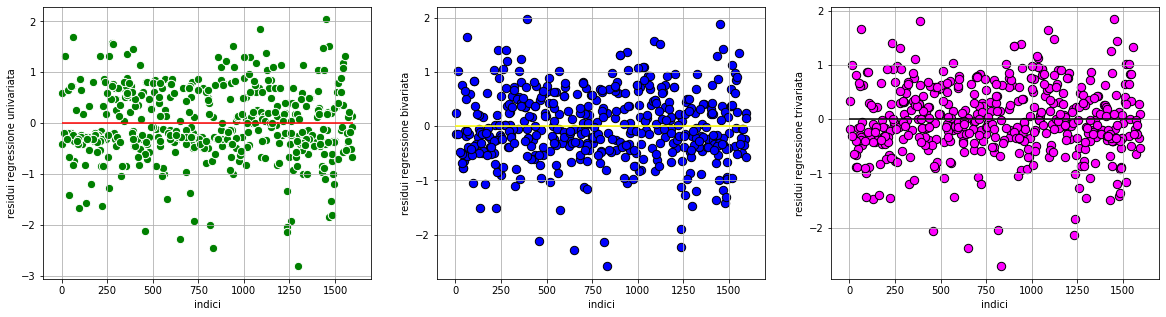

In [16]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 3, 1)
plt.xlabel('indici') 
plt.ylabel('residui regressione univariata') 
plt.hlines(0,0,X.shape[0], color='red')
plt.scatter(X_test.index,
            residuo_1_test,
            color='green',
            marker='o',
            edgecolor='white',
            s=70)

plt.grid()
plt.subplot(1, 3, 2)
plt.xlabel('indici') 
plt.ylabel('residui regressione bivariata') 
plt.hlines(0,0,X.shape[0], color='yellow')
plt.scatter(X_test.index,
            residuo_2_test,
            color='blue',
            marker='o',
            edgecolor='black',
            s=70)
plt.grid()

plt.subplot(1, 3, 3)
plt.xlabel('indici') 
plt.ylabel('residui regressione trivariata') 
plt.hlines(0,0,X.shape[0], color='black')
plt.scatter(X_test.index,
            residuo_3_test,
            color='magenta',
            marker='o',
            edgecolor='black',
            s=70)
plt.grid()
plt.show()

 **Considerazioni**:
- A livello grafico, possiamo osservare che i residui sembrano apparire omoschedastici in tutti e 3 i modelli.

**Riepilogo assunzioni**:
- Sicuramente, poichè dall'analisi dei residui abbiamo osservato la violazione dei requisiti di *normalità*, possiamo riconfermare che il modello di regressione lineare multipla non approssima al meglio il dataset, anche sul dataset di test